## DS 5230 - Being the Next Monet!
### CycleGAN
**Authors:** Gopalika Sharma and Surya Menon

We are training Generative Adversarial Networks (GANs), which are unsupervised deep learning models, to generate images in the style of Claude Monet (style transfer). This notebook specifically looks at implementing the CycleGAN architecture, which allows for image-to-image translation with unpaired images and attempts cycle consistency (image output by the first generator could be used as input to the second generator and the output of the second generator should match the original image, and vice-versa).

The following code was run on Kaggle, utilizing TPU to assist in GAN training. 

For guidance we referred to a Kaggle Notebook recommended by the competition to understand TFRecords and TPU as well as the TensorFlow Keras documentation on implementing CycleGAN. 
- https://www.tensorflow.org/tutorials/generative/cyclegan
- https://junyanz.github.io/CycleGAN/
- https://arxiv.org/abs/1703.10593
- https://www.kaggle.com/amyjang/monet-cyclegan-tutorial

### Load Packages and Preview Data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# look data from Kaggle - if downloaded data could instread change path to 'dataset' if that is 
# name of directory where you are storing data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gan-getting-started/monet_jpg/ba52f976af.jpg
/kaggle/input/gan-getting-started/monet_jpg/24af733334.jpg
/kaggle/input/gan-getting-started/monet_jpg/73f33a12c5.jpg
/kaggle/input/gan-getting-started/monet_jpg/c14505c1da.jpg
/kaggle/input/gan-getting-started/monet_jpg/b44f24c048.jpg
/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg
/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg
/kaggle/input/gan-getting-started/monet_jpg/82b9fd68b1.jpg
/kaggle/input/gan-getting-started/monet_jpg/369f6d07e8.jpg
/kaggle/input/gan-getting-started/monet_jpg/b5c2fe7c4c.jpg
/kaggle/input/gan-getting-started/monet_jpg/b1310da865.jpg
/kaggle/input/gan-getting-started/monet_jpg/baf6efabfe.jpg
/kaggle/input/gan-getting-started/monet_jpg/2cca56415e.jpg
/kaggle/input/gan-getting-started/monet_jpg/6bbe0e63c6.jpg
/kaggle/input/gan-getting-started/monet_jpg/158740962c.jpg
/kaggle/input/gan-getting-started/monet_jpg/4f045779b0.j

/kaggle/input/gan-getting-started/photo_jpg/83f5a65548.jpg
/kaggle/input/gan-getting-started/photo_jpg/82c327e9d4.jpg
/kaggle/input/gan-getting-started/photo_jpg/9d09a34740.jpg
/kaggle/input/gan-getting-started/photo_jpg/368b9526b7.jpg
/kaggle/input/gan-getting-started/photo_jpg/c1972547d1.jpg
/kaggle/input/gan-getting-started/photo_jpg/e8789baa19.jpg
/kaggle/input/gan-getting-started/photo_jpg/ad1819b0e6.jpg
/kaggle/input/gan-getting-started/photo_jpg/676d2377ea.jpg
/kaggle/input/gan-getting-started/photo_jpg/73256f9bc4.jpg
/kaggle/input/gan-getting-started/photo_jpg/43b5bdf41c.jpg
/kaggle/input/gan-getting-started/photo_jpg/7e77e7ff01.jpg
/kaggle/input/gan-getting-started/photo_jpg/2066a2e091.jpg
/kaggle/input/gan-getting-started/photo_jpg/9906756ae6.jpg
/kaggle/input/gan-getting-started/photo_jpg/299495fe20.jpg
/kaggle/input/gan-getting-started/photo_jpg/2db034b46c.jpg
/kaggle/input/gan-getting-started/photo_jpg/56539880a8.jpg
/kaggle/input/gan-getting-started/photo_jpg/75979a026b.j

/kaggle/input/gan-getting-started/photo_jpg/a23e7dfef5.jpg
/kaggle/input/gan-getting-started/photo_jpg/0d6c81cbc2.jpg
/kaggle/input/gan-getting-started/photo_jpg/065b649ac7.jpg
/kaggle/input/gan-getting-started/photo_jpg/ff2cb6658c.jpg
/kaggle/input/gan-getting-started/photo_jpg/d59e1972e6.jpg
/kaggle/input/gan-getting-started/photo_jpg/a25eb81721.jpg
/kaggle/input/gan-getting-started/photo_jpg/14c0e95507.jpg
/kaggle/input/gan-getting-started/photo_jpg/346579c393.jpg
/kaggle/input/gan-getting-started/photo_jpg/ff48e8580b.jpg
/kaggle/input/gan-getting-started/photo_jpg/00e1798585.jpg
/kaggle/input/gan-getting-started/photo_jpg/28be9a8202.jpg
/kaggle/input/gan-getting-started/photo_jpg/9b6bec8314.jpg
/kaggle/input/gan-getting-started/photo_jpg/3af0aaf3ee.jpg
/kaggle/input/gan-getting-started/photo_jpg/a8095aa2f5.jpg
/kaggle/input/gan-getting-started/photo_jpg/bba5052be8.jpg
/kaggle/input/gan-getting-started/photo_jpg/99a6c4d326.jpg
/kaggle/input/gan-getting-started/photo_jpg/4cd07a4561.j

/kaggle/input/gan-getting-started/photo_jpg/842796e8dd.jpg
/kaggle/input/gan-getting-started/photo_jpg/dea330a02f.jpg
/kaggle/input/gan-getting-started/photo_jpg/8d373e4f08.jpg
/kaggle/input/gan-getting-started/photo_jpg/0cac1bcf2b.jpg
/kaggle/input/gan-getting-started/photo_jpg/613592c5ba.jpg
/kaggle/input/gan-getting-started/photo_jpg/117281b37b.jpg
/kaggle/input/gan-getting-started/photo_jpg/73433b9176.jpg
/kaggle/input/gan-getting-started/photo_jpg/436738950d.jpg
/kaggle/input/gan-getting-started/photo_jpg/52e91ba9cf.jpg
/kaggle/input/gan-getting-started/photo_jpg/09d34f7412.jpg
/kaggle/input/gan-getting-started/photo_jpg/6b6e1046b8.jpg
/kaggle/input/gan-getting-started/photo_jpg/ce6578f48a.jpg
/kaggle/input/gan-getting-started/photo_jpg/c009f9904a.jpg
/kaggle/input/gan-getting-started/photo_jpg/2b19a7b5d3.jpg
/kaggle/input/gan-getting-started/photo_jpg/16cd6cbc68.jpg
/kaggle/input/gan-getting-started/photo_jpg/4758e5dd4c.jpg
/kaggle/input/gan-getting-started/photo_jpg/d161e72471.j

/kaggle/input/gan-getting-started/photo_jpg/a62e7a5101.jpg
/kaggle/input/gan-getting-started/photo_jpg/40ba4c1ee0.jpg
/kaggle/input/gan-getting-started/photo_jpg/6ee4e3cfa0.jpg
/kaggle/input/gan-getting-started/photo_jpg/36a9509d21.jpg
/kaggle/input/gan-getting-started/photo_jpg/fc075619e7.jpg
/kaggle/input/gan-getting-started/photo_jpg/5a294c5685.jpg
/kaggle/input/gan-getting-started/photo_jpg/9d7b548d1f.jpg
/kaggle/input/gan-getting-started/photo_jpg/2dac7d65e9.jpg
/kaggle/input/gan-getting-started/photo_jpg/cf1d695996.jpg
/kaggle/input/gan-getting-started/photo_jpg/ea2128c1b2.jpg
/kaggle/input/gan-getting-started/photo_jpg/b263b335f4.jpg
/kaggle/input/gan-getting-started/photo_jpg/b023dae26b.jpg
/kaggle/input/gan-getting-started/photo_jpg/ff258e79ce.jpg
/kaggle/input/gan-getting-started/photo_jpg/c45ddef2b3.jpg
/kaggle/input/gan-getting-started/photo_jpg/aeff6a1ad9.jpg
/kaggle/input/gan-getting-started/photo_jpg/00e64e1b2c.jpg
/kaggle/input/gan-getting-started/photo_jpg/bbd1178911.j

/kaggle/input/gan-getting-started/photo_jpg/1ece79b77f.jpg
/kaggle/input/gan-getting-started/photo_jpg/b2633e0b11.jpg
/kaggle/input/gan-getting-started/photo_jpg/6a9634ff0e.jpg
/kaggle/input/gan-getting-started/photo_jpg/0cec4d02a7.jpg
/kaggle/input/gan-getting-started/photo_jpg/cfbcd9372b.jpg
/kaggle/input/gan-getting-started/photo_jpg/b1654bdb7e.jpg
/kaggle/input/gan-getting-started/photo_jpg/417c141022.jpg
/kaggle/input/gan-getting-started/photo_jpg/241d87414d.jpg
/kaggle/input/gan-getting-started/photo_jpg/5da88da947.jpg
/kaggle/input/gan-getting-started/photo_jpg/54bf5ab7fd.jpg
/kaggle/input/gan-getting-started/photo_jpg/cd6ebe93ba.jpg
/kaggle/input/gan-getting-started/photo_jpg/6561bd46ba.jpg
/kaggle/input/gan-getting-started/photo_jpg/beebd3d7ff.jpg
/kaggle/input/gan-getting-started/photo_jpg/7533dedc3a.jpg
/kaggle/input/gan-getting-started/photo_jpg/609699b9f5.jpg
/kaggle/input/gan-getting-started/photo_jpg/6e9f6935ce.jpg
/kaggle/input/gan-getting-started/photo_jpg/2ee77c2635.j

In [3]:
# load relevant packages
import math
import random
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras.backend as K
import random, json, re, imageio, glob
import PIL
import shutil
from tensorflow.keras import Model, losses, optimizers
from tensorflow.keras.callbacks import Callback
from kaggle_datasets import KaggleDatasets

The following code activates TPU support on Kaggle which will help speed up our GAN training. 

See https://www.kaggle.com/docs/tpu for more details:

In [4]:
# activate TPU
try:
    # detect and initialize TPU
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(f'Running on TPU {tpu.master()}')
except ValueError:
    tpu = None

if tpu:
    # connect to given cluster
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # instantiate a distribution strategy
    strategy = tf.distribute.get_strategy()


REPLICAS = strategy.num_replicas_in_sync

# speed up performance with TPU
# see: https://www.tensorflow.org/guide/data_performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
print(f'REPLICAS: {REPLICAS}')

Running on TPU grpc://10.0.0.2:8470
REPLICAS: 8


In [5]:
# path for datasets (on Kaggle)
base = '../input/gan-getting-started/'
monet_path = os.path.join(base, 'monet_jpg')
photo_path = os.path.join(base, 'photo_jpg')

# alternative if download data and are in directory with the data folder
# monet_path = 'data/train/monet_jpg'
# photo_path = 'data/test/photo_jpg'

In [5]:
# look at shape size of Monet images (style to learn) and photos (apply style to)
for p in [monet_path, photo_path]:
    # create dictionary to get image shape and number of images
    print(p.split('_')[0] + 'images:')
    data_stats = {}
    for i in os.listdir(p):
        img = cv2.imread(os.path.join(p, i))
        data_stats[img.shape] = data_stats.get(img.shape, 0) + 1
    for s, c in data_stats.items():
        print('image shape: {}\t # Images: {}'.format(s, c))

../input/gan-getting-started/monetimages:
image shape: (256, 256, 3)	 # Images: 300
../input/gan-getting-started/photoimages:
image shape: (256, 256, 3)	 # Images: 7038


#### Visualize Images
These images are 256x256 RGB - we first preview some of the images as jpg, but we will conduct modeling with TFRecord format (stores data as binary strings, which takes up less space and optimized to be used with TensorFlow).

In [6]:
# plot 1 image
def plot_one(path, randomize=True, idx=0, figsize=(5, 5)):
    all_imgs = os.listdir(path)
    # pick random image
    if randomize:
        img_name = random.sample(all_imgs, 1)
        img_name = img_name[0]
    else:
        img_name = all_imgs[idx]
    img = cv2.imread(os.path.join(path, img_name))
    # RGB color
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
# function to plot images
def imgs_plot(path, n_imgs, randomize=True, figsize=(16, 16)):
    plt.figure(figsize=figsize)
    # number images height/width
    w = int(np.sqrt(n_imgs))
    h = math.ceil(n_imgs / w)
    # list imgs - either random or first n_imgs
    all_imgs = os.listdir(path)
    if randomize:
        img_names = random.sample(all_imgs, n_imgs)
    else:
        img_names = all_imgs[:n_imgs] 
    for idx, img_name in enumerate(img_names):
        img = cv2.imread(os.path.join(path, img_name))
        # RGB color
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        plt.subplot(h, w, idx + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

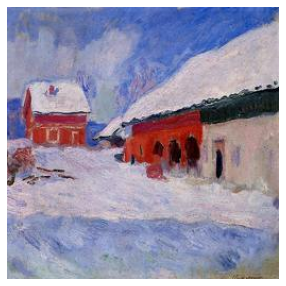

In [7]:
# plot 1 random Monet image
plot_one(monet_path)

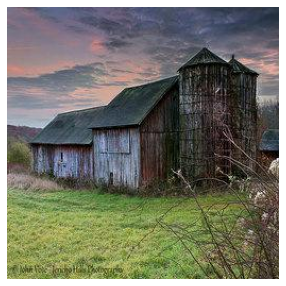

In [8]:
# plot 1 photo - specify index
plot_one(photo_path,randomize=False, idx=10)

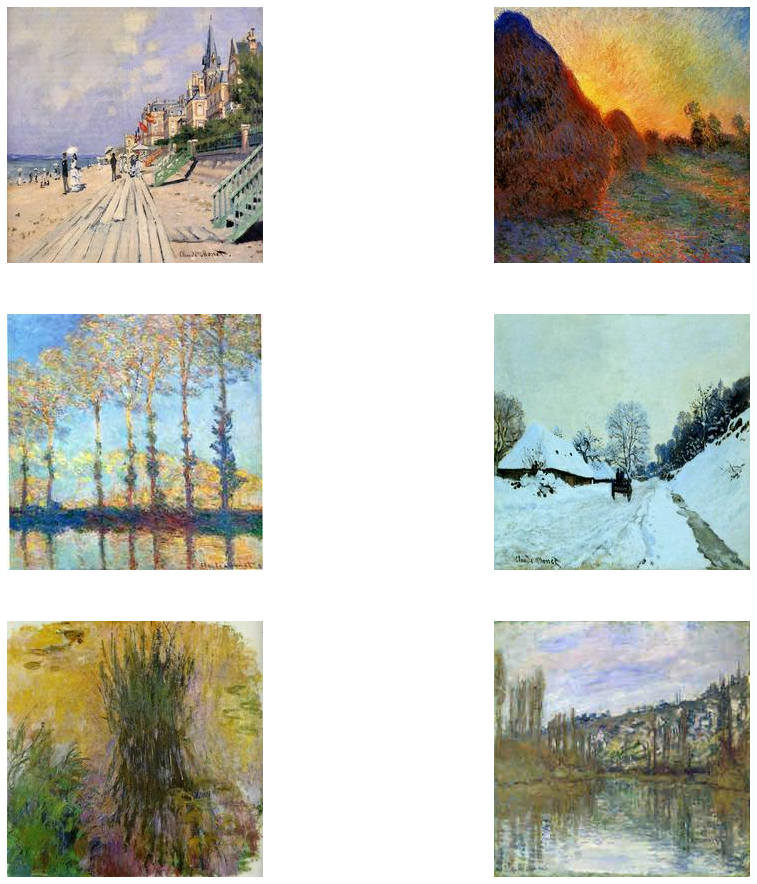

In [16]:
# plot 6 random Monet images
imgs_plot(monet_path, 6)

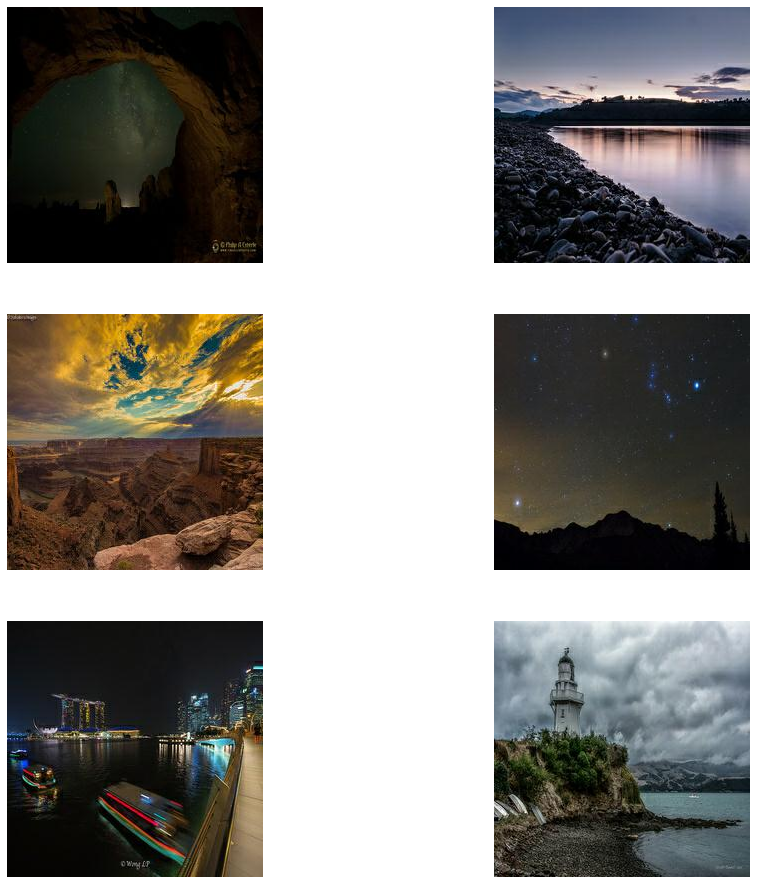

In [17]:
# plot 6 random photos
imgs_plot(photo_path, 6)

### Process Images and Load Data
We will next start working with the TFRecord files. Kaggle had a suggested procedure to follow in order to find and read in these data files, as seen [here](https://www.kaggle.com/amyjang/monet-cyclegan-tutorial).

More documentation on TFRecords: https://www.tensorflow.org/tutorials/load_data/tfrecord.

In [9]:
# find paths for TFRecord data
GCS_PATH = KaggleDatasets().get_gcs_path()

MONET_FILENAMES = tf.io.gfile.glob(str(GCS_PATH + '/monet_tfrec/*.tfrec'))
PHOTO_FILENAMES = tf.io.gfile.glob(str(GCS_PATH + '/photo_tfrec/*.tfrec'))

In [10]:
# look at TFRecord files
print('Number of Monet TFRecord Files:', len(MONET_FILENAMES))
print('Number of Photo TFRecord Files:', len(PHOTO_FILENAMES))

Number of Monet TFRecord Files: 5
Number of Photo TFRecord Files: 20


We create functions, again following Kaggle documentation on how to read TFRecords, to read these files and convert the JPG image formats into tensors. 

Next we need to normalize the image data to speed up model training. Documentation for CycleGAN cited that normalizing inputs between -1 and 1 and utilizing tanh activation functions resulted in optimal performance (also discussed [here](https://datascience.stackexchange.com/questions/54296/should-input-images-be-normalized-to-1-to-1-or-0-to-1)). To get this range, we can first divide pixels by (255/2 = 127.5) to get to [0, 2] and then we subtract 1; this can be seen in the CycleGAN TensorFlow implementation: https://www.tensorflow.org/tutorials/generative/cyclegan. 

Since the images have been resized to the same size (256x256) for competition, not much other initial preprocessing seems necessary. Also note since are working iwth RGB images, we have 3 channels. These steps help us prepare the inputs (images) to pass to the GAN. 

In [24]:
# convert jpg img into tensor, normalize
def decode_img(img):
    # convert to tensor - 3 since RGB
    img = tf.image.decode_jpeg(img, channels=3)
    # normalize to [-1,1]
    img = (tf.cast(img, tf.float32) / 127.5) - 1
    # reshape to correct size
    img = tf.reshape(img, [256, 256, 3])
    return img

# read TFRecord
def read_tf(ex):
    # define format 
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image":      tf.io.FixedLenFeature([], tf.string),
        "target":     tf.io.FixedLenFeature([], tf.string)
    }
    # parse 1 example
    ex = tf.io.parse_single_example(ex, tfrecord_format)
    
    # decode and normalize img into tensor
    img = decode_img(ex['image'])    
    
    # return image tensor (don't need target or name)
    return img 

In [13]:
# load dataset function - extract images from files into tensors
def load_data(fnames, labeled=True, ordered=False):
    # create dataset
    data = tf.data.TFRecordDataset(fnames)
    # map a dataset with a mapping function read_tf and 
    # parallel calls is set to AUTOTUNE - when set up TPU
    data = data.map(read_tf, num_parallel_calls=AUTOTUNE)
    return data

Now we load the data for Monet images and the photos as appropriate inputs. We initially will not batch the images together. 

More info on batching: https://www.tensorflow.org/api_docs/python/tf/data/TFRecordDataset

In [76]:
# load monet and photo images
# don't combine consecutive element with batch(1)
monet_ds = load_data(MONET_FILENAMES, labeled=True).batch(1)
photo_ds = load_data(PHOTO_FILENAMES, labeled=True).batch(1)

In [23]:
# look at tensor images
def tensor_img_view(data, nrows=1, ncols=5):
    # make dataset iterable
    data_iter = iter(data)
    # set size and plots
    f = plt.figure(figsize=(25, nrows * 5.05))
    # loop thru all the images (number of rows * number of columns)
    for i in range(ncols * nrows):
        # get next img
        img = next(data_iter)
        # convert to numpy array
        img = img.numpy()
        ax = f.add_subplot(nrows, ncols, i+1, xticks=[], yticks=[])
        # convert back to [0, 1] so can display
        # https://stackoverflow.com/questions/52138920/why-do-we-normalize-the-image-to-mean-0-5-std-0-5
        ax.imshow(img[0] * 0.5 + 0.5) 

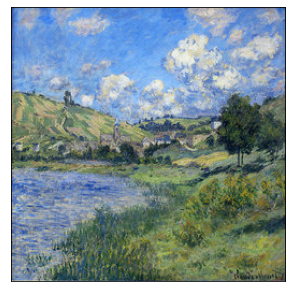

In [32]:
# look at 1 Monet
tensor_img_view(monet_ds,1, 1)

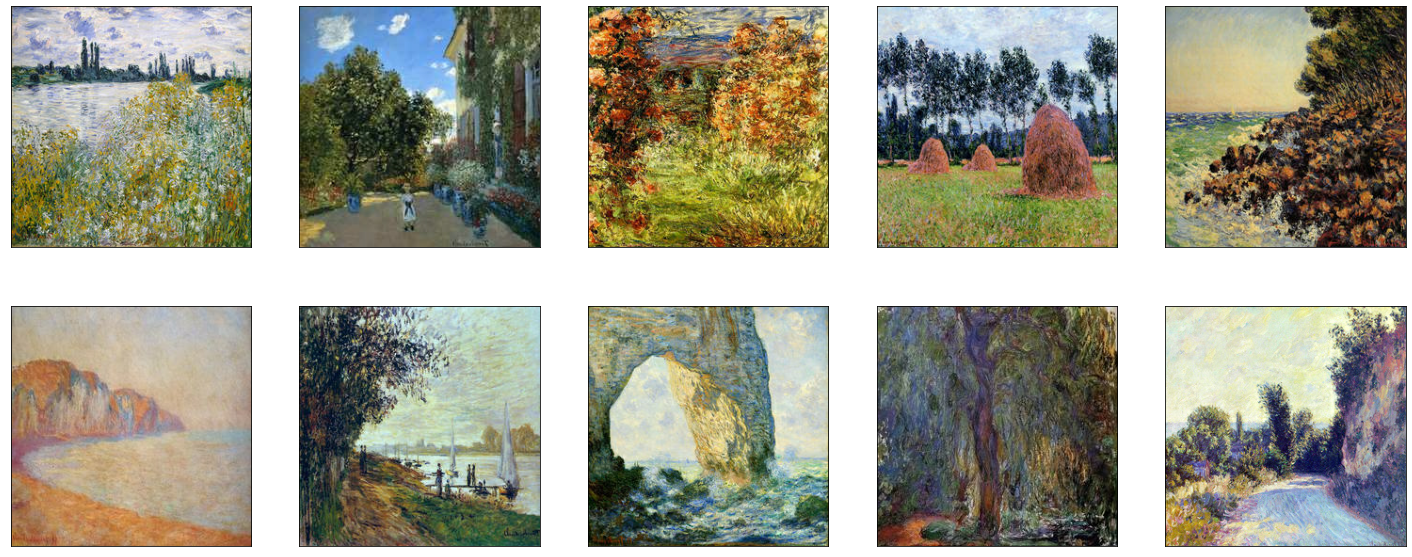

In [33]:
# look at multiple Monets
tensor_img_view(monet_ds,2, 5)

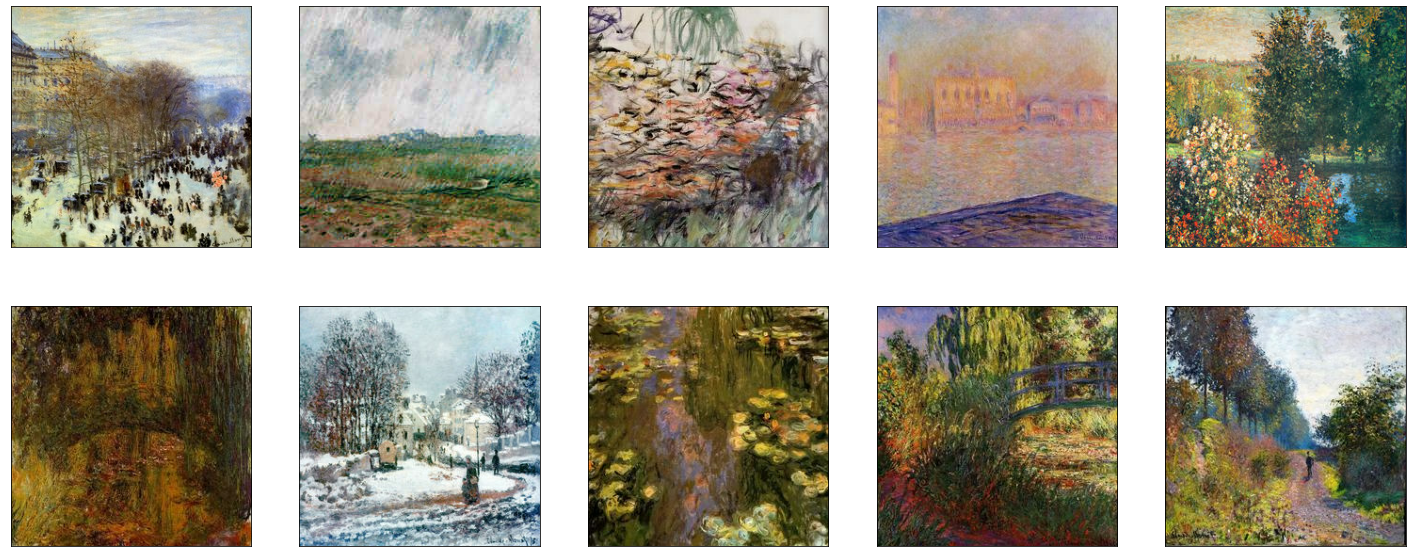

In [34]:
# look at multiple images
tensor_img_view(photo_ds,2, 5)

### Create CycleGAN

Next we build the CycleGAN model, following the Kaggle tutorial as well as TensorFlow documentation on implementing this architecture. Specifically, TensorFlow implements a [UNET](https://en.wikipedia.org/wiki/U-Net) archiecture (a CNN designed to work with fewer training images, as seen here) and the Pix2Pix generator/discriminator stuctures for GAN (used fo rimage to image translations). 

See the following resources:
- https://www.tensorflow.org/tutorials/generative/cyclegan
- https://machinelearningmastery.com/a-gentle-introduction-to-pix2pix-generative-adversarial-network/
- https://www.tensorflow.org/tutorials/generative/pix2pix
- https://arxiv.org/pdf/1511.06434.pdf

#### Generator

First we will create `downsample` and `upsample` methods for our generator and discriminators. 
Downsampling reduces the height and width of images by stride size (2 in this case) and reduce dimensionality/features to speed up computation. For GANs, it is recommended by some sources to implement this with strides rather than pooling (see: https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/).
Upsampling does the opposite to return back to a larger image output.

We also utilized instance normalization to improve training time, this function is specifically relevant for style transfer (normalizing. across channels, such as RGB in this case). It is also seen as replacement for batch normalization in GANs. For different variations we explored different standard deviation values.

More information on instance normalization: 
- https://medium.com/techspace-usict/normalization-techniques-in-deep-neural-networks-9121bf100d8
- https://mlexplained.com/2018/11/30/an-overview-of-normalization-methods-in-deep-learning/
- https://www.tensorflow.org/addons/tutorials/layers_normalizations

In [35]:
# create downsample - follow tips for stable GAN
def downsample(filts, size, instance_norm=True):
    # set standard deviation
    sd = 0.02
    # sd = 0.05
    
    stride=2
    #stride=4
    
    # specify initialization
    init = tf.random_normal_initializer(0.0, sd)
    # pass to instance normalization
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=sd)
    
    # create sequential model with convolutional layers
    res = keras.Sequential()
    res.add(layers.Conv2D(filts, size, strides=stride, padding='same',
                             kernel_initializer=init, use_bias=False))
    
    # incorporate instance normalize
    if instance_norm:
        res.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
        
    # leaky ReLU to deal with vanishing gradient issue (prevent further training)
    res.add(layers.LeakyReLU())
    return res

In [36]:
# create upsample - undo downsample and increase dimensions 
# can apply dropout to regularize and deal with overfitting
def upsample(filts, size, to_dropout=False):
    # set standard deviation
    sd = 0.02
    # sd = 0.05
    
    stride=2
    #stride=4
    
    # specify initialization
    init = tf.random_normal_initializer(0.0, sd)
    # pass to instance normalization
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=sd)
    
    # create sequential model with convolutional layers
    res = keras.Sequential()
    # so Conv2DTranspose instead of Conv2D
    res.add(layers.Conv2DTranspose(filts, size, strides=stride,padding='same',
                             kernel_initializer=init, use_bias=False))
    
    # instance normalize
    res.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
               
    # include dropout - according to Pix2Pix architecture
    if to_dropout:
        res.add(layers.Dropout(0.5))
    
    res.add(layers.ReLU())
    return res

We combine upsampling and downsampling into a generator; the architecture is again following the Pix2Pix implementation. The generator is responsible for learning the Monet style and applying it to input images.

We downsample the the input image and upsamples with skip connections to help deal with vanishing gradient and help recover information that may have been lost in downsampling (https://theaisummer.com/skip-connections ). 

We again explored a couple of standard deviation values for normalization. Additionally we included/excluded some downsample and upsample layers.

In [1]:
# create generator 
def Generator():
    # set standard deviation
    sd = 0.02
    # sd = 0.05
    
    stride=2
    #stride=4
    
    # pass image shape
    inp = layers.Input(shape=[256,256,3])
    
    # stack for downsample - as seen in Pix2Pix
    down_stk = [
        downsample(64, 4, instance_norm=False),
        #downsample(128, 4),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        #downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4)
    ]
    
    # stack for upsample - as seen in Pix2Pix (undo downsample)
    # dropout some layers
    up_stk = [
        upsample(512, 4, to_dropout=True), 
        upsample(512, 4, to_dropout=True), 
        upsample(512, 4, to_dropout=True), 
        upsample(512, 4), 
        #upsample(512, 4),
        #upsample(512, 4),
        upsample(256, 4), 
        upsample(128, 4), 
        upsample(64, 4), 
    ]
        
    init = tf.random_normal_initializer(0.0, sd)
    # apply last layer to generator - use tanh
    last_lyr = layers.Conv2DTranspose(3, 4,strides=stride,padding='same',
                                  kernel_initializer=init,activation='tanh')
    
    x = inp
    # apply downsample
    skips = []
    for d in down_stk:
        x = d(x)
        skips.append(x)
        
    # reverse order to upsample
    skips = reversed(skips[:-1])
    
    # apply upsample
    for u, s in zip(up_stk, skips):
        x = u(x)
        x = layers.Concatenate()([x, s])
        
    x = last_lyr(x)
    
    # return generator
    return keras.Model(inputs=inp, outputs=x)

#### Discriminator 

The discriminator will take the input and classify it is real or fake (has been generated to look like Monet in this case). This feedback will help the generator learn how to produce more realistic outputs over time. Similar to the generator model, we experimented with different standard deviation values.

In [47]:
# create discriminator - similar init - Pix2Pix arch
# not use sequential this time - functional api
def Discriminator():
    # set standard deviation
    sd = 0.02
    # sd = 0.05
    
    stride=1
    #stride=2
    #stride=4
    
    # specify initialization
    init = tf.random_normal_initializer(0.0, sd)
    # pass to instance normalization
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=sd)
    
    # get input - image size
    inp = layers.Input(shape=[256, 256, 3], name='input_image')
    x = inp
    
    # downsample
    d1 = downsample(64, 4, instance_norm=False)(x) 
    d2 = downsample(128, 4)(d1) 
    d3 = downsample(256, 4)(d2) 
    
    # padding
    zeropad1 = layers.ZeroPadding2D()(d3)
    
    # convolutional layer
    conv1 = layers.Conv2D(512, 4, strides=stride,kernel_initializer=init,
                         use_bias=False)(zeropad1) 
    # instance normalize
    n1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv1)
    
    # apply Leaky ReLU
    leaky_relu = layers.LeakyReLU()(n1)
    
    # padding
    zeropad2 = layers.ZeroPadding2D()(leaky_relu)
    
    # apply last layer to generator - use tanh
    last_lyr = layers.Conv2DTranspose(1, 4,strides=stride,
                                      kernel_initializer=init)(zeropad2)
    
    return tf.keras.Model(inputs=inp, outputs=last_lyr)

Since this is a CycleGAN, we learn image translation in both directions - making photos in the style of Monet and making Monet paintings look more like realistics photos. To assist this process we create 2 generators and 2 discriminators for each process (we apply TPU distribution based on the Kaggle notebook format): 

In [48]:
# apply TPU to distribute create generators/discriminators - later for loss fncs as well
with strategy.scope():
    # apply Monet style
    monet_generator = Generator()
    # opposite - make Monet paintings more like photos (not as focused on this)
    photo_generator = Generator() 

    # differentiate real and generated Monet images
    monet_discriminator = Discriminator() 
    # differentiate real and generated photos (not focus on this)
    photo_discriminator = Discriminator() 

In [ ]:
# preview that generator is not working yet
ex_monet = next(iter(monet_ds))
ex_photo = next(iter(photo_ds))

# pass next test image into untrained generator
into_monet = monet_generator(ex_photo)

# visualize - just noise
plt.subplot(1, 2, 1)
plt.title("Original Photo")
plt.imshow(ex_photo[0] * 0.5 + 0.5)

plt.subplot(1, 2, 2)
plt.title("Monet-styled Photo")
plt.imshow(into_monet[0] * 0.5 + 0.5)
plt.show()

#### Create full CycleGAN
To implement the full CycleGAN architecure, both the Kaggle tutorial and the Keras documentation for implementing this model create a sub-class of Keras models to define the generators/discriminators, optimizers, and loss functions for both processes (Monet > img and img > Monet). This allows for inheritance of Keras model methods like `fit`. We copied this implementation below. The only change we tested in this class was varying the lambda.

See the following for implementation of the sub-class
- https://keras.io/examples/generative/cyclegan/

A quick overview of the training process (for the direction we care about): the model applies Monet style to photo and then converts back to a photo, and the difference between original image and returned image is a loss measure, which we want to minimize. This defines the special property of the CycleGAN, *cycle consistency* - the image output of the first generator (apply Monet style) can be used as input to second generator (apply photo style), whose output can be shown to match original image, and vice-versa. This allows for regularization of the generators and helps further with image translation.

For more details: https://machinelearningmastery.com/what-is-cyclegan/.

In [56]:
# use Keras model to define
# from: https://keras.io/examples/generative/cyclegan/
class CycleGan(keras.Model):
    def __init__(
        self,
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        lambda_cycle=10,
        #lambda_cycle=5,
    ):
        # apply to super class
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle
        
    def compile(
        self,
        m_gen_optimizer,
        p_gen_optimizer,
        m_disc_optimizer,
        p_disc_optimizer,
        # will define loss functions next
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        
    # define training procedure
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        # track gradients for backprop
        with tf.GradientTape(persistent=True) as tape:
            # GENERATOR
            # photo to monet back to photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)
            
            # monet to photo back to monet - probably care most about this
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)
            
            # generating self
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)
            
            # DISCRIMINATOR
            # discriminate used to check, inputing real images
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)
            
            # discriminate used to check, inputing fake images
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)
            
            # LOSS CALCULATIONS
            # loss from each generator
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)
            
            # evaluates total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, 
                        self.lambda_cycle) + self.cycle_loss_fn(real_photo, 
                        cycled_photo, self.lambda_cycle)
            
            # calculate total generator loss (with cycle)
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)
            
            # discriminator loss
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)
            
        # GRADIENTS
        # generator gradients
        monet_generator_gradients = tape.gradient(total_monet_gen_loss,
                                        self.m_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss,
                                        self.p_gen.trainable_variables)
        # discriminator gradients
        monet_discriminator_gradients = tape.gradient(monet_disc_loss,
                                        self.m_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss,
                                        self.p_disc.trainable_variables)
            
        # apply gradients
        self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients,
                                                self.m_gen.trainable_variables))
        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients,
                                                self.p_gen.trainable_variables))
        self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients,
                                                self.m_disc.trainable_variables))
        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients,
                                                self.p_disc.trainable_variables))
        
        # return losses as dict
        return {
            "monet_gen_loss": total_monet_gen_loss,
            "photo_gen_loss": total_photo_gen_loss,
            "monet_disc_loss": monet_disc_loss,
            "photo_disc_loss": photo_disc_loss
        }

#### Define Loss Functions
There are multiple loss functions that are considered when training GAN models:
- *Discriminator Loss* - compares real images to matrix of 1's and generated images to a matrix of 0's; perfect discriminator will replicate those matrices exactly (minimizing loss). Final loss is average of real and generated loss values. 
- *Generator Loss* - goal is to trick discriminator to think generated image is real (thus increasing its loss); perfect generators will only result in discriminator replicating 1 matrices. Compare generate image to matrix of 1 and try to minimize the loss.
- *Cycle Consistency Loss* - when original photo is compared to an image that has been styled with Monet and then transformed back to an image, we want the loss to be minimal; find average in difference between these images.
- *Identity Loss* - compare image itself with generator trying to replicate it (so Monet image with Monet generator). If pass a Monet image to the Monet generator we want the same original input - minimize the loss between the input and output for the generator in this case.

More on loss functions can be seen here: https://machinelearningmastery.com/cyclegan-tutorial-with-keras/. Binary cross-entropy is employed for the generator and discriminator losses.

Again, we followed the Kaggle tutorial and TensorFlow documentation on how to create loss functions:
https://www.tensorflow.org/tutorials/generative/cyclegan.

In [57]:
# define all loss function - use TPU
with strategy.scope():
    # discriminator loss - average of real (1) and generated (0) loss
    def discriminator_loss(real, gen):
        real_loss = losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.ones_like(real), real)
        gen_loss = losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.zeros_like(gen), gen)
        total_loss = real_loss + gen_loss
        return total_loss * 0.5
    
    # generator loss
    def generator_loss(gen):
        return losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.ones_like(gen), gen)
    
    # cycle loss - real photo versus twice transformed photo (see how generate back)
    with strategy.scope():
        def calc_cycle_loss(real_img, cycled_img, LAMBDA):
            # mean absolute difference
            loss = tf.reduce_mean(tf.abs(real_img - cycled_img))
            return LAMBDA * loss
        
    # identity loss - photo with generated photo from photo generator
    with strategy.scope():
        def identity_loss(real_img, same_img, LAMBDA):
            # mean absolute difference
            loss = tf.reduce_mean(tf.abs(real_img - same_img))
            return LAMBDA * 0.5 * loss  

### Training

Multiple sources (such as: https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/) recommend using Adam optimization to apply gradient descent to GANs and compile the generators and discriminators. TensorFlow documentation recommends a learning rate of 2e-4 and a `beta_1` of 0.5, but we testing another variation for the learning rate.

Then since we implemented a sub-class of a Keras model, we can run `fit` to start training our GAN.

In [77]:
# define optimizers - TPU
lr = 2e-4
# lr = 1e-5
with strategy.scope():
    monet_generator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)
    photo_generator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)

    monet_discriminator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)
    photo_discriminator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)
    
# alternate tests for Adam: beta_2=0.99,epsilon=1e-08

In [78]:
# compile - TPU
with strategy.scope():
    # create instance of model
    cycle_gan_model = CycleGan(
        monet_generator, photo_generator, 
        monet_discriminator, photo_discriminator
    )
    # compile optimizers and loss functions
    cycle_gan_model.compile(
        m_gen_optimizer = monet_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        m_disc_optimizer = monet_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss,
        cycle_loss_fn = calc_cycle_loss,
        identity_loss_fn = identity_loss
    )

We train our CycleGAN for 30 epochs (in previous runs we tested a couple of variations). When looking at the TensorFlow documentation, they conducted 40 epochs to keep training time reasonable. The original CycleGAN paper used 200 epochs, and that will produce optimal results. However, due to time constraints and limits to TPU usage on Kaggle, we limited our epochs as well; we looked at 25 and then 30 epochs.

In [79]:
# train with `fit` since created subclass - TPU
EPOCHS = 30
# EPOCHS = 25
cycle_gan_model.fit(tf.data.Dataset.zip((monet_ds, photo_ds)),
    epochs=EPOCHS
)

Epoch 1/30
300/300 [==============================] - 39s 129ms/step - monet_disc_loss: 0.6633 - photo_disc_loss: 0.5157 - monet_gen_loss: 3.6641 - photo_gen_loss: 4.1040
Epoch 2/30
300/300 [==============================] - 39s 130ms/step - monet_disc_loss: 0.6431 - photo_disc_loss: 0.5482 - monet_gen_loss: 3.5851 - photo_gen_loss: 3.9789
Epoch 3/30
300/300 [==============================] - 39s 129ms/step - monet_disc_loss: 0.6419 - photo_disc_loss: 0.6174 - monet_gen_loss: 3.3962 - photo_gen_loss: 3.6029
Epoch 4/30
300/300 [==============================] - 39s 130ms/step - monet_disc_loss: 0.6364 - photo_disc_loss: 0.5730 - monet_gen_loss: 3.2936 - photo_gen_loss: 3.5701
Epoch 5/30
300/300 [==============================] - 39s 129ms/step - monet_disc_loss: 0.6311 - photo_disc_loss: 0.6282 - monet_gen_loss: 3.1813 - photo_gen_loss: 3.3178
Epoch 6/30
300/300 [==============================] - 39s 129ms/step - monet_disc_loss: 0.6289 - photo_disc_loss: 0.6179 - monet_gen_loss: 3.0990

### Initial Results
After applying training, we view some of the generated images alongside the original input. Specifically, we see how the Monet generator performs, applying Monet style to a photo image.

In [80]:
# create a function to look at model-generated images
def view_generate(data, gen_mod, n_samples):
    data_iter = iter(data)
    # go through n_samples examples
    for n in range(n_samples):
        ex = next(data_iter)
        generate = gen_mod.predict(ex)
        
        # original and generated side by side
        plt.subplot(121)
        plt.title("Original")
        # calculate back to original values
        plt.imshow(ex[0] * 0.5 + 0.5)
        plt.axis('off')
        
        plt.subplot(122)
        plt.title("Generated")
        plt.imshow(generate[0] * 0.5 + 0.5)
        plt.axis('off')
        plt.show()

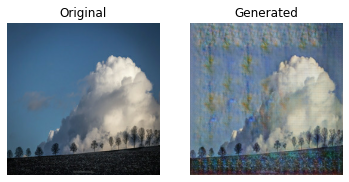

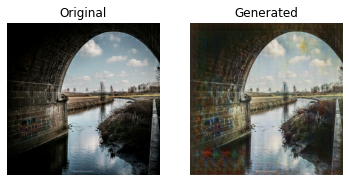

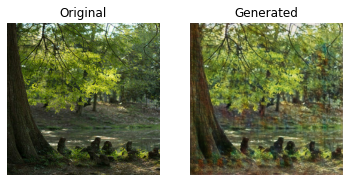

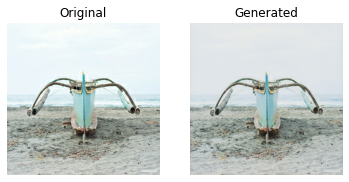

In [81]:
# look at Monet generator
view_generate(load_data(PHOTO_FILENAMES).batch(1), monet_generator, 4)

The generators images have applied some style, but still seem pretty close to the original images. A couple appear to have more styling, so additional training or data may be necessary to improve these results. 

Just for fun, we see how the photo generator works on Monet images:

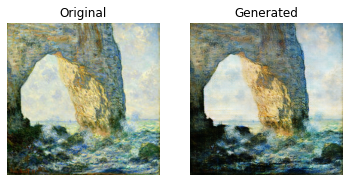

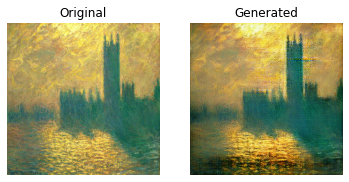

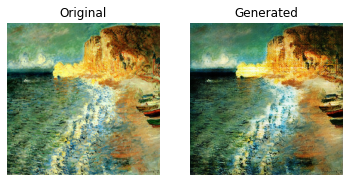

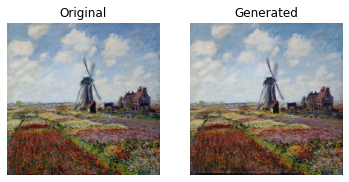

In [82]:
# look at photo generator
view_generate(load_data(MONET_FILENAMES).batch(1), photo_generator, 4)

### Data Augmentation

To increase training samples for GAN to work with, we also look to implement some data augmentation to enhance the data set size (which only has 300 Monet images). We limit the methods applied to spatial (e.g., flip, rotate, crop) and not other aesthetics, such as changing brightness or contrast in images, because those features can affect the original style of the image, which is what we are trying to learn and apply. We followed a Kaggle Notebook that implemented augmenatation to assist: https://www.kaggle.com/dimitreoliveira/improving-cyclegan-monet-paintings#Augmentations - they augmented each image if they met certain probability thresholds for each feature. We experimented with a couple of variations in probabilities and adjustment metrics.

Sources:
- https://blog.paperspace.com/unpaired-image-to-image-translation-with-cyclegan/
- https://www.tensorflow.org/tutorials/generative/cyclegan/

In [12]:
# function to conduct some data augmentation to help with training - run later
# limit to spatial (flip, rotate, crop)
def photo_augment(img):
    # define random amounts for each transform type
    prob_rotate = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    prob_spatial = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    prob_crop = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    
    # apply cropping if meet threshold
    if prob_crop > 0.5:
    #if prob_crop > 0.4
        # enlarge before crop to oriignal size
        img = tf.image.resize(img, [286, 286])
        #img = tf.image.resize(img, [275, 275])
        img = tf.image.random_crop(img, size=[256, 256, 3])
        # do again to crop larger amount
        if prob_crop > 0.7:
        #if prob_crop > 0.9:
            img = tf.image.resize(img, [300, 300])
            #img = tf.image.resize(img, [400, 400])
            img = tf.image.random_crop(img, size=[256, 256, 3])
    
    # apply rotation by 90º increments
    if prob_rotate > 0.9:
    #if prob_rotate > 0.8:
        # 270º
        img = tf.image.rot90(img, k=3) 
    elif prob_rotate > 0.7:
    #elif prob_rotate > 0.6:
        # 180º
        img = tf.image.rot90(img, k=2) 
    elif prob_rotate > 0.5:
    #elif prob_rotate > 0.4:
        # 90º
        img = tf.image.rot90(img, k=1) 
    
    # random flipping
    if prob_spatial > 0.7:
    #if prob_spatial > 0.5:
        # flip horizontal or vertical 
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_flip_up_down(img)
        # switch height/width
        if prob_spatial > 0.9:
        #if prob_spatial > 0.8:
            img = tf.image.transpose(img)

    return img

We apply data augmentation and then to assist in training, we increase the size of the data set, shuffle the data and create batch sizes for the training process. We again followed the Kaggle tutorials to determine batch size, but tried a couple of values (as well as for buffer size).

In [86]:
# reload data
monet_ds1 = load_data(MONET_FILENAMES, labeled=True)
photo_ds1 = load_data(PHOTO_FILENAMES, labeled=True)

In [87]:
# augment images - increase data size
monet_ds1 = monet_ds1.map(photo_augment, num_parallel_calls=AUTOTUNE)
photo_ds1 = photo_ds1.map(photo_augment, num_parallel_calls=AUTOTUNE)

In [88]:
# repeat dataset so seen repeatedly (epochs) 
monet_ds1 = monet_ds1.repeat()
photo_ds1 = photo_ds1.repeat()

In [89]:
# shuffle data - randomize iteration - set buffer size to sample from
BUFFER = 2048
#BUFFER = 3000
#BUFFER = 2000

monet_ds1 = monet_ds1.shuffle(BUFFER)
photo_ds1 = photo_ds1.shuffle(BUFFER)

In [90]:
# set batch size for training
BATCH_SIZE =  4
#BATCH_SIZE =  10

monet_ds1 = monet_ds1.batch(BATCH_SIZE, drop_remainder=True)
photo_ds1 = photo_ds1.batch(BATCH_SIZE, drop_remainder=True)

In [91]:
# cache data - run and don't run 
monet_ds1 = monet_ds1.cache()
photo_ds1 = photo_ds1.cache()

In [92]:
# prefetch data - TPU support
# help with training: https://www.tensorflow.org/guide/data_performance
monet_ds1 = monet_ds1.prefetch(AUTOTUNE)
photo_ds1 = photo_ds1.prefetch(AUTOTUNE)

After preparing/augmenting the dataset, we create a new CycleGAN instance and conduct training again, using batches to help with training and augmentation. This training took about 2 hours to complete (for our final iteration). We again tried a couple of variation by learning rate, batch size, and epochs.

In [93]:
# new model instance
with strategy.scope():
    # apply Monet style
    monet_generator1 = Generator()
    # opposite - make Monet paintings more like photos (not as focused on this)
    photo_generator1 = Generator() 

    # differentiate real and generated Monet images
    monet_discriminator1 = Discriminator() 
    # differentiate real and generated photos (not focus on this)
    photo_discriminator1 = Discriminator()

In [94]:
# optimizers
lr = 2e-4
# lr = 1e-5
with strategy.scope():
    monet_generator_optimizer1 = tf.keras.optimizers.Adam(lr, beta_1=0.5)
    photo_generator_optimizer1 = tf.keras.optimizers.Adam(lr, beta_1=0.5)

    monet_discriminator_optimizer1 = tf.keras.optimizers.Adam(lr, beta_1=0.5)
    photo_discriminator_optimizer1 = tf.keras.optimizers.Adam(lr, beta_1=0.5)

In [95]:
# compile
with strategy.scope():
    # create instance of model
    cycle_gan_model1 = CycleGan(
        monet_generator1, photo_generator1, 
        monet_discriminator1, photo_discriminator1
    )
    # compile 
    cycle_gan_model1.compile(
        m_gen_optimizer = monet_generator_optimizer1,
        p_gen_optimizer = photo_generator_optimizer1,
        m_disc_optimizer = monet_discriminator_optimizer1,
        p_disc_optimizer = photo_discriminator_optimizer1,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss,
        cycle_loss_fn = calc_cycle_loss,
        identity_loss_fn = identity_loss
    )

In [96]:
# train on this data
n_monet_samples = 300
n_photo_samples = 7038

EPOCHS = 30
# EPOCHS = 40

cycle_gan_model1.fit(tf.data.Dataset.zip((monet_ds1, photo_ds1)),
    epochs=EPOCHS, steps_per_epoch=(n_photo_samples//BATCH_SIZE),
)

Epoch 1/30
1759/1759 [==============================] - 230s 131ms/step - monet_disc_loss: 0.6380 - photo_disc_loss: 0.6069 - monet_gen_loss: 3.3096 - photo_gen_loss: 3.4449
Epoch 2/30
1759/1759 [==============================] - 229s 130ms/step - monet_disc_loss: 0.6228 - photo_disc_loss: 0.6065 - monet_gen_loss: 2.5623 - photo_gen_loss: 2.6793
Epoch 3/30
1759/1759 [==============================] - 229s 130ms/step - monet_disc_loss: 0.6225 - photo_disc_loss: 0.6170 - monet_gen_loss: 2.4189 - photo_gen_loss: 2.5117
Epoch 4/30
1759/1759 [==============================] - 229s 130ms/step - monet_disc_loss: 0.6315 - photo_disc_loss: 0.6181 - monet_gen_loss: 2.3306 - photo_gen_loss: 2.4391
Epoch 5/30
1759/1759 [==============================] - 230s 131ms/step - monet_disc_loss: 0.6457 - photo_disc_loss: 0.6276 - monet_gen_loss: 2.2214 - photo_gen_loss: 2.3527
Epoch 6/30
1759/1759 [==============================] - 230s 130ms/step - monet_disc_loss: 0.6480 - photo_disc_loss: 0.6193 - mone

### Visualize New Generated Outputs
When exploring the Monet generator outputs, we see much improved results; the Monet style is clearly applied over all of the images and appear much more like paintings than the original input images. In particular, it appears to perform the best on nature images or images with large skylines. 

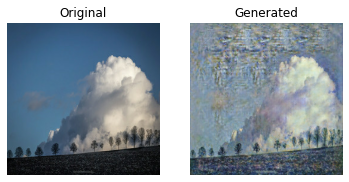

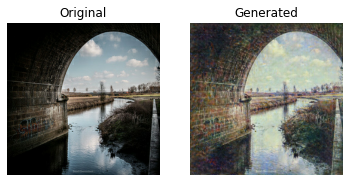

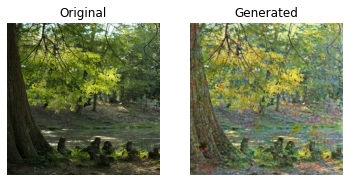

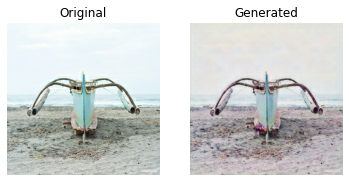

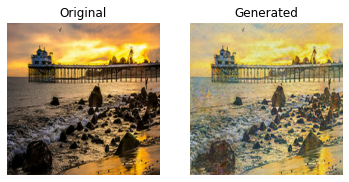

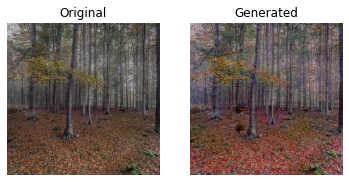

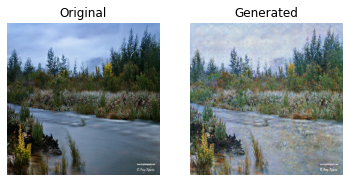

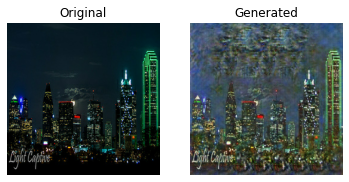

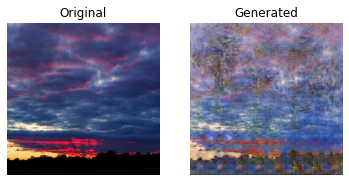

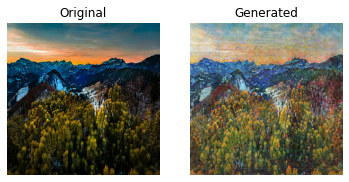

In [97]:
# look at outputs for new model
view_generate(photo_ds1.batch(1), monet_generator1, 10)

Next we have to generate outputs for all 7,038 photo images in the data. We run the Monet generator on each image and then convert these outputs back into the JPG format. Again we follow the Kaggle tutorial to determine the conversion. In Kaggle we create an `images` directory to pass these outputs. This function took quite some time to run. After this is completed, we zip the `images` directory. We downloaded the zip file locally, where we can decide to submit to the Kaggle competition at our convenience.

In [98]:
# create predictions
# alternate
def generate_img(inputs, gen_mod, out_path):
    i = 1
    #all_imgs = os.listdir(photo_path)
    for img in inputs:
    # for idx, img in enumerate(inputs):
        #if i % 5 ==0:
            #print('image:' + str(i))
            
        # predict img (no longer training)
        predict = gen_mod(img, training=False)[0].numpy() 
        
        # convert back to original color scale
        predict = (predict * 127.5 + 127.5).astype(np.uint8) 
        # img_name = all_imgs[idx]
        img_PIL = PIL.Image.fromarray(predict)
        # save as jpg
        img_PIL.save(f'{out_path}{str(i)}.jpg')
        #img_PIL.save(f'{out_path}{img_name}.jpg')
        i += 1

In [99]:
# make directory for generated images - took a while to run
os.makedirs('../images/') 

# create test images
generate_img(photo_ds1.batch(1), monet_generator1, '../images/')

In [100]:
# print number of generated images
num_gen = len([n for n in os.listdir('../images/') if os.path.isfile(os.path.join('../images/', n))])
print("# generated samples: {}".format(num_gen))

# generated samples: 7038


In [101]:
# zip images folder
shutil.make_archive("/kaggle/working/images", 'zip', "/kaggle/images")

'/kaggle/working/images.zip'

In [102]:
# download local copy
from IPython.display import FileLink
FileLink('images.zip')

/kaggle/working/images.zip

The Kaggle competition scores the photos using the MiFID metric, or Memorization-informed Fréchet Inception Distance, which modifies the [Fréchet Inception Distance](https://arxiv.org/abs/1706.08500) (FID). The goal is to minimize this score, which is used as a standard evaluation method for GANs. The FID calculates the distance between feature vectors created for the real and generated images, and the MiFID additionally includes the minimum cosine distance of the training samples averaged by generated samples as an additional weight.

Details about the Kaggle MiFID metric are included here: https://www.kaggle.com/c/gan-getting-started/overview/evaluation

Additional information about the FID metric can be read here: https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/

The actual calculation is not included here, but we pass the `images.zip` file as a submission to the competition to get our score. Our best model with CycleGAN received a score of 40.54309:

![cyclegan_mifid](cycle_gan_mifid.png "CycleGAN MiFID Score")